<a href="https://colab.research.google.com/github/MittalNeha/Mask_RCNN/blob/master/Mask_rcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#!git clone https://github.com/akTwelve/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 979, done.
remote: Total 979 (delta 0), reused 0 (delta 0), pack-reused 979
Receiving objects: 100% (979/979), 137.72 MiB | 14.26 MiB/s, done.
Resolving deltas: 100% (570/570), done.


In [1]:
! git clone https://github.com/MittalNeha/Mask_rcnn.git

Cloning into 'Mask_rcnn'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 112 (delta 56), reused 14 (delta 6), pack-reused 0
Receiving objects: 100% (112/112), 2.65 MiB | 7.54 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [ ]:
%cd Mask_RCNN/
!pip install -r requirements.txt

In [8]:
%cd /content/Mask_RCNN/mrcnn
from m_rcnn import *
%matplotlib inline

/content/Mask_RCNN/mrcnn
VERS 0.2
... done downloading pretrained model!


In [10]:
#Loading dataset
# Extract Images
images_path = "dataset/images.zip"
annotations_path = "dataset/annotations.json"
annotations_val_path = "dataset/annotations_val.json"

extract_images(os.path.join("/content/drive/My Drive/Mask_rcnn",images_path), "/content/dataset")

Extracted: 290 images


In [11]:
dataset_train = load_image_dataset(os.path.join("/content/drive/My Drive/Mask_rcnn", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/drive/My Drive/Mask_rcnn", annotations_val_path), "/content/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/drive/My Drive/Mask_rcnn/dataset/annotations.json
Annotation json path:  /content/drive/My Drive/Mask_rcnn/dataset/annotations_val.json
Train: 158
Validation: 0
Classes: 2


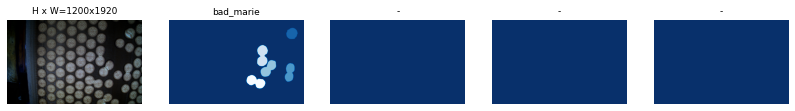

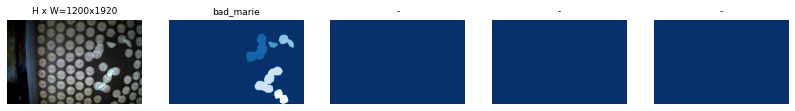

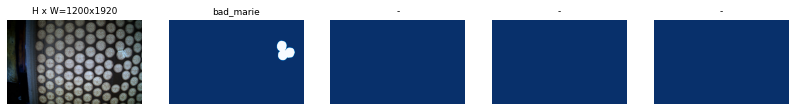

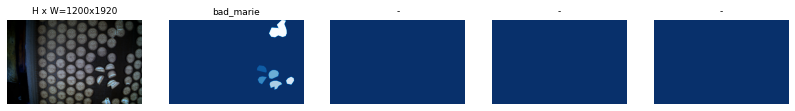

In [ ]:
# Load image samples
display_image_samples(dataset_train)

3. Training
Train Mask RCNN on your custom Dataset.

In [12]:
# Load Configuration
config = CustomConfig(class_number)
#config.display()
model = load_training_model(config)

/content/drive/MyDrive/Mask_rcnn/logs/mask_rcnn_coco.h5


In [ ]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config,6)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/MyDrive/Mask_rcnn/logs/object20221008T0313/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask

In [ ]:
train_head(model, dataset_train, dataset_train, config,20)

In [ ]:
train_head(model, dataset_train, dataset_train, config,40)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/MyDrive/Mask_rcnn/logs/object20220801T0900/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)

4. Detection (test your model on a random image)

In [ ]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/drive/MyDrive/Mask_rcnn/logs/object20220801T0900/mask_rcnn_object_0040.h5
Re-starting from epoch 40


In [ ]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)

IndexError: ignored

In [ ]:
# Load Image
from visualize import random_colors, get_mask_contours, draw_mask
img = cv2.imread("/content/scd.jpeg")

test_model, inference_config = load_inference_model(1, "/content/drive/MyDrive/Mask_rcnn/logs/object20220707T1548/mask_rcnn_object_0005.h5")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]
colors = random_colors(80)

In [ ]:
from google.colab.patches import cv2_imshow
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])

In [ ]:
cv2_imshow(img)